# NLP With Hotel Review Part l

**Author: Darius Smith**

**BrainStation | Data Science | March 13, 2023**

## Purpose:

The purpose of this notebook, will be to begin with the process of Exploratory Data Analysis (EDA), and then move into data augmentation, modelling, and iteration over model improvements for Hotel Reviews. A data dictionary has not been provided, so the the first step is to upload the data, understand what columns are provided, the shape, etc.


To begin doing this, the proper librabies must imported. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_df = pd.read_csv("Hotel_Reviews.csv")
hotel_df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
hotel_df.tail(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/9/2015,8.1,Atlantis Hotel Vienna,Hungary,I was in 3rd floor It didn t work Free Wife,13,2823,staff was very kind,6,1,8.3,"[' Leisure trip ', ' Family with young childre...",725 day,48.203745,16.335677


In [4]:
#Gaining an understanding od the datatypes in the dataset.
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

**Features:** 

- Hotel_Address **(categorical)** 
- Additional_Number_of_Scoring **(numerical)** 
- Review_Date **(categorical)**
- Average_Score **(numerical)** 
- Hotel_Name **(categorical)**  	
- Reviewer_Nationality **(categorical)** 
- Negative_Review **(categorical)**
- Review_Total_Negative_Word_Counts **(numerical)** 
- Total_Number_of_Reviews **(numerical)** 
- Positive_Review **(categorical)**
- Review_Total_Positive_Word_Counts **(numerical)** 
- Total_Number_of_Reviews_Reviewer_Has_Given **(numerical)**
- Tags **(categorical)** 
- days_since_review **(categorical)**
- lat **(numerical)** 
- lng **(numerical)** 

**Target:** 

- Reviewer_Score **(numerical)** 

## Inital Observation and EDA Plan: 

**This is a 'text data' set.** The EDA plan listed below will be used to gain an understanding of the data

- Determine the shape of the dataset, missing values, and duplicated rows.
- The reviews provided are all given as decimal values. Convert them into integers from 1 to 10
- The reviews are scored from 1 to 10. Answer the following, "What do you expect the distribution of scores to look like? What is the actual distribution of reviews?"
- Given this will be a classification problem, what is a potential problem with this distribution?
- This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

**Moving forward with the first step, determining the shape, missing values, and duplicated rows.** 

In [5]:
#Getting an EDA summary 
print(f"Rows: {hotel_df.shape[0]}")
print(f"Columns: {hotel_df.shape[1]}")
print(f"Missing values: {hotel_df.isna().sum().sum()}")
print(f"Duplicated rows: {hotel_df.duplicated().sum()}")

Rows: 515738
Columns: 17
Missing values: 6536
Duplicated rows: 526


**The next step from here, will be identify what are the missing values, and then dropping duplicate rows.** 

In [6]:
#Gaining the view of missing values.
#It is clear that the missing values are in the latitude and logitude column. 
hotel_df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [7]:
#Calculating the proportion of nulls missing. 
hotel_df.isna().mean()*100

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.633655
lng                                           0.633655
dtype: float64

**Both Latitude and Longitude ('lat' and 'lng') are missing the same amount of values. This could mean that they are missing in the same locations. Mode, mean, and median cannot be used to impute latitude and longitude. However, the proper method would be to look at the latitude and logitude that is missing values, and comparing this to either the Hotel Address or Hotel Name and filling the missing values that way. Another method could be to drop the lattiude and longitude given that the proportion of missing values are both 0.63%.**

The next step, will be the following: 

- removing duplicated data.
- gaining an understand of which Hotel Name, or Address are missing values
- deciding what to do with missing values. 

In [8]:
#Gaining total sum of duplicated rows. 
hotel_df.duplicated().sum()

526

In [9]:
#Dropping duplicated rows in the dataset
hotel_df.drop_duplicates(inplace=True)

In [10]:
#Sanity check 
hotel_df.duplicated().sum()

0

In [11]:
#Gaining an understanding of which hotel names are missing 'lat' values and total count. 
hotel_df[hotel_df['lat'].isna()][['Hotel_Name']].value_counts()

Hotel_Name                                      
Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28

In [12]:
#Gaining an understanding of which hotel names are missing 'lng' values and total count. 
hotel_df[hotel_df['lng'].isna()][['Hotel_Name']].value_counts()

Hotel_Name                                      
Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28

**Given that the missing valeus are 0.63% of the dataframe, the method that will be used is to drop the missing values. The latitude and longitude is not a variable that is important for our analysis.**

In [13]:
#Dropping all missing values
hotel_df = hotel_df.dropna(how='any',axis=0) 

In [14]:
#Sanity check to see if there are any missing values. 
hotel_df.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

**There are 515,738 hotel reviews with 17 features and 1 target variable attributed to them. There were 6,536 missing values, and 526 rows were highlighted as duplicates. Missing values and duplicates have been dealt with appropiately.** 

The next step, will be to proceed with **'Sentiment Analysis.'** In this case, gaining an understanding of the mood of text. The hotel reviews, are either `Negative_Review` or `Positive_Review`. The rating given by the hotel reviewer is the `Reviewer_Score`. The ratings are in floats, and these will be converted into integers. After converting, then there will be an analysis at the distribution of scores. 

**Pre- Analysis Hypothesis**

The reviews are scored from 1 to 10. Generally, in the wild, people who have a negative experiences are more likely to to give a bad review. In this case, 'bad' may mean anything less than a (6) rating. On the other hand, people who have good experiences, are less likely to leave a review, or may not feel compelled to. With this inital thinking, the distribution of the `Reviewer_Score` may show more reviews in the (5 - 8) column range. 

In [15]:
#Getting a sample of the negative review phrases first and the associated scores. 
print(hotel_df[['Negative_Review', 'Reviewer_Score']].sample(5).values)

[['No Negative' 8.3]
 ['No Negative' 7.9]
 ['No Negative' 7.5]
 [' The hotel had only one taxi they took 30 mins to arrive and charged 2 x the amount of black cabs Also remote control didn t work Reported it Saturday morning still not fixed when we left Sunday morning Probably only needed new batteries The hotel was further away from the tube station than represented on the web site My fried could not walk that distance do we needed to get a taxi to and from the tube station each time '
  5.4]
 [' Room size is very small' 7.9]]


**Looking at a sample for the `Negative_Review`column:**

- The highest rating is a 8.3.
- The lowest rating observed is a 5.4
- 'No Negative' is a phrase used to describe a review. 

In [16]:
#Getting a sample of the positive review phrases and the associated scores. 
print(hotel_df[['Positive_Review', 'Reviewer_Score']].sample(5).values)

[[' location' 3.8]
 [' An excellent location friendly staff and high level service ' 9.2]
 ['No Positive' 6.7]
 [' Cleanliness' 5.0]
 [' Staff best in our England experience Design very cool Room layout extremely clever Nice residential neighborhood a few minutes easy walk to restaurants and Underground Wonderful experience and our favorite stay in England '
  10.0]]


**Looking at a sample for the `Positive_Review`column:**

- The highest observed rating is a 10.0.
- The lowest observed rating is a 3.8. This does not make sense. 

**The review scores are in a 'float64' datatype, converting to 'int64' datatype**

**Then, taking a look at the distribution of the `Reviewer_Score`.**

In [17]:
#Converting the column.
hotel_df['Reviewer_Score'] = hotel_df['Reviewer_Score'].astype(np.int64)

In [18]:
#Sanity check 
hotel_df['Reviewer_Score'].unique()

array([ 2,  7,  3,  6,  4, 10,  5,  9,  8])

In [19]:
#Count of the total review scores by specific score. 
hotel_df['Reviewer_Score'].value_counts().sort_index()

2       3754
3       6888
4      11453
5      29990
6      34090
7      92496
8      87824
9     130301
10    115148
Name: Reviewer_Score, dtype: int64

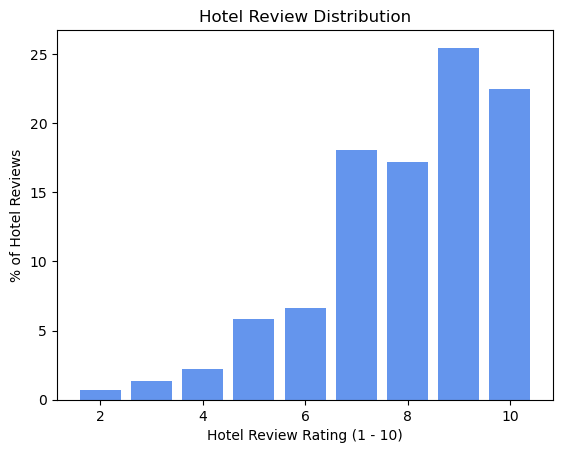

In [20]:
#Looking at the distribution of ratings

values, counts = np.unique(hotel_df['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100, color='cornflowerblue')
plt.xlabel('Hotel Review Rating (1 - 10)')
plt.ylabel('% of Hotel Reviews')
plt.title("Hotel Review Distribution")
plt.show()

## Observations of Hotel Review Distribution

The initial hypothesis was that the reviews are would be more in the (5 - 8) range. The thinking was that people are more likely to leave a bad review vs a good review. However, the distribution shows something surprising:

1. There may be a data imbalance. The majority of the reviews seem to be in the (7-10) range.
2. No one left a (1) in the review score. 

This may present a problem for modeling in the future as it could bring challenges to feature correlation, class separation and evaluation, and results in poor model performance. It is also not clear truly what a good score actually is. This will be noted for future work on the dataset.

## Non-Numeric and Numeric Columns

There is a good mix of non-numeric and numeric columns. In the beginning of the notebook, numeric, and non-numeric were listed out. Now, after looking a little more extensively at the data, there will be an attempt to convert some of the non-numeric columns to numeric. The attempt will be to do `astype()` however knowing that this is text data, vectorization may be more viable or even `onehotencoding` or pd.dummies. 

The following columns will be attempted:

1. `Review_Date` - converting to datetime.
2. `Reviewer Nationality` - converting to int.
3. `days_since_review` - converting to int.

In [21]:
#Looking at counts of the dates
hotel_df['Review_Date'].value_counts().sort_index()

1/1/2016      336
1/1/2017      559
1/10/2016     787
1/10/2017     672
1/11/2016     424
             ... 
9/7/2016      534
9/8/2015     1176
9/8/2016      782
9/9/2015      366
9/9/2016      367
Name: Review_Date, Length: 731, dtype: int64

In [22]:
#Attempting to convert to datetime
hotel_df['Review_Date'] = pd.to_datetime(hotel_df['Review_Date'])

In [23]:
#Sanity Check 
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511944 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               511944 non-null  object        
 1   Additional_Number_of_Scoring                511944 non-null  int64         
 2   Review_Date                                 511944 non-null  datetime64[ns]
 3   Average_Score                               511944 non-null  float64       
 4   Hotel_Name                                  511944 non-null  object        
 5   Reviewer_Nationality                        511944 non-null  object        
 6   Negative_Review                             511944 non-null  object        
 7   Review_Total_Negative_Word_Counts           511944 non-null  int64         
 8   Total_Number_of_Reviews                     511944 non-null  int64        

**`Review_Date` has successful been converted into a numerical column. The next columns will be `Reviewer_Nationality`and `days_since_review`. However, before converting these columns into numeric, an additional step will be made to better understand `Reviewer_Score`. This will be done by coverting the column into a binary column in the following way:**

**Reviews that are below 9, will be encoded as 0 ('not good'), and reviews with scores 9 and 10 as 1 ('good')**

In [24]:
#Converting the column into a binary column.
#Sanity check 1
hotel_df['Reviewer_Score'] = np.where(hotel_df['Reviewer_Score'] >= 9, 1, 0)
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [25]:
#Sanity check 2
hotel_df['Reviewer_Score'].value_counts()

0    266495
1    245449
Name: Reviewer_Score, dtype: int64

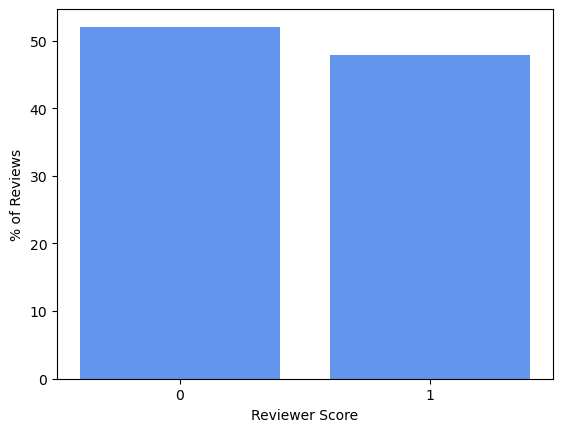

Percentage of 'not good' and 'good' Reviews: [0.52 0.48]


In [26]:
#Plotting for visual representation
values, counts = np.unique(hotel_df['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100, color='cornflowerblue') 
plt.xlabel('Reviewer Score')
plt.ylabel('% of Reviews')
plt.show()
print(f"Percentage of 'not good' and 'good' Reviews: {np.round(normalized_counts, 2)}")

**The `Reviewer_Score` column has been converted into a binary column. Now, moving forward with converting the additional column (`Reviewer_Nationality` and `days_since_review`) into a numeric column. After this, all non-numeric columns except Positive_Review and Negative_Review will be dropped.** 

In the `days_since_review` column, the strings 'days' and 'day' are making the column an object. The process will be to strip these strings from the column and replace the datatype as int.

In [27]:
#Stripping the 'days' from column with sanity check. 
hotel_df['days_since_review'] = hotel_df['days_since_review'].str.rstrip('days')
hotel_df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968


In [28]:
#Stripping the word 'day' from column with sanity check.
hotel_df['days_since_review'] = hotel_df['days_since_review'].str.rstrip('day')
hotel_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,"[' Leisure trip ', ' Family with older childre...",704,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,"[' Leisure trip ', ' Family with young childre...",712,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,"[' Leisure trip ', ' Family with older childre...",715,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,0,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717,48.203745,16.335677


In [29]:
#Converting to int
hotel_df['days_since_review'] = hotel_df['days_since_review'].astype('int')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511944 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               511944 non-null  object        
 1   Additional_Number_of_Scoring                511944 non-null  int64         
 2   Review_Date                                 511944 non-null  datetime64[ns]
 3   Average_Score                               511944 non-null  float64       
 4   Hotel_Name                                  511944 non-null  object        
 5   Reviewer_Nationality                        511944 non-null  object        
 6   Negative_Review                             511944 non-null  object        
 7   Review_Total_Negative_Word_Counts           511944 non-null  int64         
 8   Total_Number_of_Reviews                     511944 non-null  int64        

The `days_since_review` has successfully been converted into an integer. Now, moving forward with the `Reviewer_Nationality` column. 

In [30]:
#Gaining an understanding of how many nationalities we have of reviewers. 
hotel_df['Reviewer_Nationality'].value_counts()

 United Kingdom               244321
 United States of America      35108
 Australia                     21502
 Ireland                       14733
 United Arab Emirates          10170
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

In [31]:
#Getting a more in depth view of the nationalities contained within the column. 
hotel_df['Reviewer_Nationality'].unique()

array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

**There are (227) nationalities within the column. Will be using dummy variables to convert this column into a numerical column.**

In [32]:
#Making a copy of original dataframe to new data frame
hotel_df2 = hotel_df.copy()

In [33]:
#Getting dummary variables for Reviewer_Nationality
hotel_df2 = pd.get_dummies(hotel_df, columns = ['Reviewer_Nationality'])

In [34]:
#Sanity check 
display(hotel_df2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Reviewer_Nationality_ Uruguay,Reviewer_Nationality_ Uzbekistan,Reviewer_Nationality_ Vanuatu,Reviewer_Nationality_ Vatican City,Reviewer_Nationality_ Venezuela,Reviewer_Nationality_ Vietnam,Reviewer_Nationality_ Wallis and Futuna,Reviewer_Nationality_ Yemen,Reviewer_Nationality_ Zambia,Reviewer_Nationality_ Zimbabwe
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,...,0,0,0,0,0,0,0,0,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,...,0,0,0,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,...,0,0,0,0,0,0,0,0,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,...,0,0,0,0,0,0,0,0,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,no trolly or staff to help you take the lugga...,14,2823,location,2,...,0,0,0,0,0,0,0,0,0,0
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,...,0,0,0,0,0,0,0,0,0,0
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,...,0,0,0,0,0,0,0,0,0,0
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,No Negative,0,2823,The rooms are enormous and really comfortable...,25,...,0,0,0,0,0,0,0,0,0,0


**`Reviewer_Nationality` has been converted into a numeric column. Now, moving forward with the following:** 

- Dropping all non-numeric columns except Positive_Review and Negative_Review.
- Splitting the data into train and test sets.
- Using a count vectorizer to combine Positive_Review and Negative_Review with the numeric data.

In [35]:
hotel_df2.drop(['Hotel_Address', 'Hotel_Name', 'Tags'], axis=1)

,Additional_Number_of_Scoring,Review_Date,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_ Uruguay,Reviewer_Nationality_ Uzbekistan,Reviewer_Nationality_ Vanuatu,Reviewer_Nationality_ Vatican City,Reviewer_Nationality_ Venezuela,Reviewer_Nationality_ Vietnam,Reviewer_Nationality_ Wallis and Futuna,Reviewer_Nationality_ Yemen,Reviewer_Nationality_ Zambia,Reviewer_Nationality_ Zimbabwe
0,194,2017-08-03,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,0,0,0,0,0,0,0,0,0
1,194,2017-08-03,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,0,0,0,0,0,0,0,0
2,194,2017-07-31,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,0,0,0,0,0,0,0,0
3,194,2017-07-31,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,0,0,0,0,0,0,0,0
4,194,2017-07-24,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,168,2015-08-30,8.1,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,...,0,0,0,0,0,0,0,0,0,0
515734,168,2015-08-22,8.1,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,...,0,0,0,0,0,0,0,0,0,0
515735,168,2015-08-19,8.1,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,...,0,0,0,0,0,0,0,0,0,0
515736,168,2015-08-17,8.1,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,0,...,0,0,0,0,0,0,0,0,0,0


**All non-numeric columns have been dropped except, `Positive_Review` and `Negative_Review`.
Moving foward with splitting the data into train and test sets. In this case it will the target variable of `Reviewer_Score`**

In [38]:
#Importing libraby train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [39]:
#Instatiating the X and y
X = hotel_df.drop(columns='Reviewer_Score')
y = hotel_df2['Reviewer_Score']

#Splitting the X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)


In [40]:
#Sanity check 
display(X_train.head(5))

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng
164762,372 Strand Westminster Borough London WC2R 0JJ...,2288,2017-01-08,8.1,Strand Palace Hotel,France,For our short stay not much We were very plea...,12,9568,Stayed there about 10 years ago and saw a mar...,25,1,"[' Leisure trip ', ' Group ', ' Standard Twin ...",207,51.511099,-0.120867
66405,163 Marsh Wall Docklands Tower Hamlets London ...,2682,2017-04-23,7.1,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,0,9086,Nice room service and good view from the room...,12,4,"[' Leisure trip ', ' Couple ', ' Standard Sing...",102,51.501910,-0.023221
27716,101 Buckingham Palace Road Westminster Borough...,838,2015-11-15,8.4,The Grosvenor,United Kingdom,No bar facilities after 10 30 in the evening ...,22,3274,Convenient location,3,9,"[' Leisure trip ', ' Family with older childre...",627,51.495666,-0.145279
202710,5 rue du 8 Mai 1945 10th arr 75010 Paris France,710,2015-10-06,7.9,Holiday Inn Paris Gare de l Est,Switzerland,very poor internet coverage in the room poor ...,32,6511,Ambiance is really good and comfortable,8,2,"[' Business trip ', ' Couple ', ' Double Room ...",667,48.875898,2.359050
249402,8 Pembridge Garden Kensington and Chelsea Lond...,149,2016-04-12,8.9,The Laslett,Turkey,breakfast could have been better and cheaper,8,623,everything was perfect,4,24,"[' Leisure trip ', ' Couple ', ' Double Room '...",478,51.509526,-0.196723


In [41]:
#Sanity check 
display(X_test.head(5))

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng
315858,Eerste Constantijn Huygensstraat 10A Oud West ...,218,2017-03-29,7.5,Grand Hotel Downtown,Ireland,Staff were not very pleasant,6,1270,Having an outside terrace views amazing,7,2,"[' Leisure trip ', ' Couple ', ' Penthouse Sui...",127,52.365130,4.872942
450100,Silvio Pellico 4 Milan City Center 20121 Milan...,254,2016-04-09,9.3,Room Mate Giulia,United Arab Emirates,Nothing,2,2011,Nice stuff Andrea A Andrea F Hany So friendly,10,16,"[' Leisure trip ', ' Family with young childre...",481,45.465137,9.189525
420666,Prinsengracht 315 331 Amsterdam City Center 10...,182,2017-04-27,9.1,Pulitzer Amsterdam,United Arab Emirates,A bit pricey for what you get,9,909,Location was amazing,5,7,"[' Leisure trip ', ' Group ', ' Deluxe King Ro...",98,52.372835,4.883326
255566,84 King Street Hammersmith and Fulham London W...,390,2016-03-01,7.8,Best Western Plus Seraphine Hammersmith Hotel,United Kingdom,Unfortunately the lift from ground to third f...,19,1717,Very good location for this hotel and right o...,24,10,"[' Leisure trip ', ' Couple ', ' Standard Doub...",520,51.492627,-0.228860
300074,Comte d Urgell 232 Eixample 08036 Barcelona Spain,74,2017-07-24,8.7,U232 Hotel,United Kingdom,No Negative,0,873,Great location near the metro lots of lovely ...,21,1,"[' Leisure trip ', ' Couple ', ' Double or Twi...",10,41.389524,2.149031


In [42]:
#Seperating the positive and negative reviews

X_train_positive_review = X_train['Positive_Review']
X_train_negative_review = X_train['Negative_Review']


X_test_positive_review = X_test['Positive_Review']
X_test_negative_review = X_test['Negative_Review']


hotel_reviews_= [X_train_positive_review, X_train_negative_review, X_test_positive_review, X_test_negative_review]

**Positive_Review and Negative_Review have been split. The next step will be to use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data. This will be done first by importing the proper library from sklearn, and then creating a vectored list to to combine all of the data.**

In [43]:
#Importing library 
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
#Creating a vectorized list 

vectorized_df_list = []

#Creating a for loop to go through hotel reviews

for entry in hotel_reviews_:
    
    #New dataframe, which allows the vectorized information to be included.
    
    reviews_ = pd.DataFrame({"Reviews": entry})
    
    #Create the vectorizing function 
    #min_df parameter to exclude any token that occurs in less than 10% of documents or text
    
    bag_of_words = CountVectorizer(min_df = 0.10)
    
    #Fitting the function with the data to be vectorized
    
    bag_of_words.fit(reviews_['Reviews'])
    
    #Vectorizing the data
    
    reviews_transformed = bag_of_words.transform(reviews_['Reviews'])

    #Create a new data frame from the vectorized data
    
    combined_df = pd.DataFrame(columns=bag_of_words.get_feature_names_out(), data=reviews_transformed.toarray())
    
    #Adding the vectorized dataframe to the others.
    vectorized_df_list.append(combined_df)

In [45]:
#Sanity check 
for df in vectorized_df_list:
    
    display(df.head(5))

,and,breakfast,clean,comfortable,excellent,for,friendly,good,great,helpful,...,nice,of,room,staff,the,to,very,was,were,with
0,2,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,2,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,and,but,for,hotel,in,is,it,negative,no,not,of,on,room,the,to,very,was,we
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,2,0,0,0,2,0,0,0,1,1,0,1,0,0
3,1,0,1,1,2,0,0,0,0,0,0,0,1,2,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,and,breakfast,clean,comfortable,excellent,for,friendly,good,great,helpful,...,nice,of,room,staff,the,to,very,was,were,with
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,1,1,1,0,...,0,1,1,1,1,0,0,0,0,0


,and,but,for,hotel,in,is,it,negative,no,not,of,on,room,the,to,very,was,we
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


**Positive review, negative review, and the numeric dataframe were combined successfully.**

In count vectorization, the **min_df parameter** is removing terms that appear too frequently, also known as "corpus-specific stop words. For example:

- if a (min_df = 0.01), it would mean ignore terms that appear in less than 1% of the documents or text.
- if a (min_df = 5) it would mean ignore terms that appear in less than 5 documents or text.

In the vectorization above min_df = 0.10 was used which means that it would ignore terms that appear in less than 10% of the documents or text.

## Conclusion

This notebook is a preliminary analysis of hotel data. In this notebook the following was done: 

- cleaning of data, specifically removal of null values and duplicate rows. 
- gaining an understanding of hotel review distrubution 
- completing some sentiment analysis
- converting non-numeric columns to numeric for future modeling
- using count vectorization, and bag-of-words model 